## Task 05: Image Processing Basics in Python

As far as computers are concerned, images are simply numerical data representations. You can use statistical techniques to manipulate and analyze the numerical properties of images.

In this task, you are required to understand and get familiar with commonly-used syntax involved in image-processing. Further, you should implement some basic geometric transformations and verify them with outputs obtained from libraries.

## Task 05 - a : Loading and Displaying an Image
Let's start by loading a PNG file and examining its properties. Run the following cell to load and display an image using the **matplotlib.image** library. You are requested to execute the cells one-by-one after going through the syntax of each cell.

numpy.ndarray

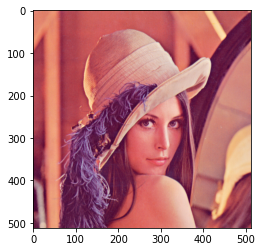

In [1]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img1 = mpimg.imread('lena.png')
plt.imshow(img1)
type(img1)

So we can see the file is definitely an image, but note that the data type of the **img1** object is actually a multidimensional numpy array.

Let's take a closer look at this array by printing it's shape:

In [2]:
print("Image Shape : " , img1.shape)

Image Shape :  (512, 512, 3)


The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities. Each layer of the image represents 512 x 512 pixels (the dimensions of the image).

Now let's load and display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

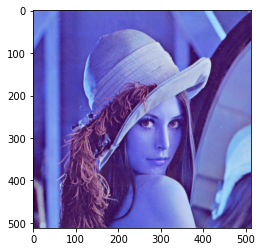

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img2 = cv2.imread('lena.png')
plt.imshow(img2)
type(img2)

Once again we've got a multidimensional array; but the image appears with a blue-tint

The problem is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB). This can be fixed as follows:

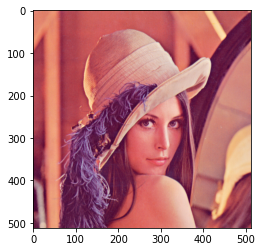

In [4]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

That's better - now the image is a numpy array with 3 dimensions for red, green, and blue.

There's one more commonly used library for image processing in Python we should consider - **PIL**:

PIL.PngImagePlugin.PngImageFile

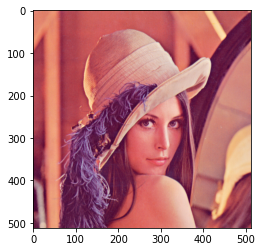

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img3 = Image.open('lena.png')
plt.imshow(img3)
type(img3)

This time, the data type is a JpegImageFile - not a numpy array. That's great if we only want to manipulate it using PIL methods; but sometimes we'll want to be flexible and process images using mulitple libraries; so we need a consistent format.

Fortunately, it's easy to convert a PIL JpegImageFile to a numpy array:

In [7]:
import numpy as np

img3 = np.array(img3)
img3.shape

(512, 512, 3)

So fundamentally, the common format for image libraries is a numpy array. Using this as the standard format for your image processing workflow, converting to and from other formats as required, is the best way to take advantage of the particular strengths in each library while keeping your code consistent.

You can even save a numpy array in an optimized format, should you need to persist images into storage:

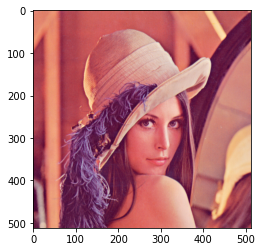

In [10]:
import numpy as np

# Save the image
np.save('img.npy', img3)

#Load the image
img3 = np.load('img.npy')

plt.imshow(img3)

## Task 05 - b : Resizing an Image
One of the most common manipulations of an image is to resize it. This can be particularly important when you're preparing multiple images to train a machine learning model, as you'll generally want to ensure that all of your training images have consistent dimensions.

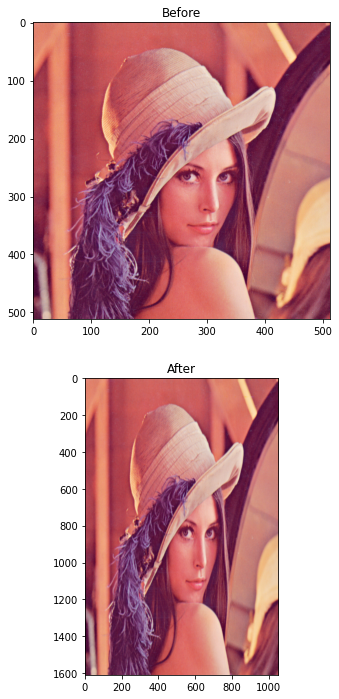

In [11]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

img2_resized = cv2.resize(img2, (1050, 1610))

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img2)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(img2_resized)
a.set_title('After')

plt.show()


## Task 05 - c : Examining Numerical Properties of the Image Array
So we've seen that an image is inherently an array of values. Let's examine that in more detail. What type of values are in the array?

In [12]:
img3.dtype

dtype('uint8')

OK, so the array consists of 8-bit integer values. In other words, whole numbers between 0 and 255. These represent the possible pixel intensities for the RGB color channels in each pixel of the image.

## Task 05 - d : Visualize RGB Channels Separately
Implement a function below that produces three numpy arrays corresponding to Red, Green and Blue channels of an RGB image

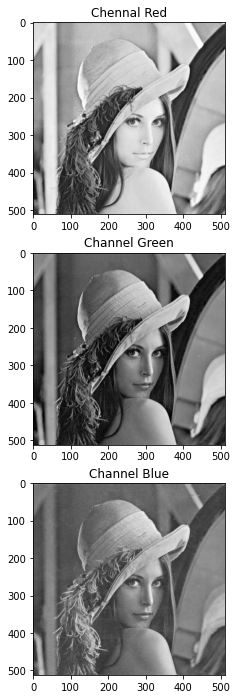

In [33]:
def split_rgb(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    return R, G, B

R, G, B = split_rgb(img2)

# Show the different channels of an RGB image
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(R, cmap='gray')
a.set_title('Chennal Red')

# Subplot for gray-scale-custom image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(G, cmap='gray')
a.set_title('Channel Green')

# Subplot for gray-scale-custom image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(B, cmap='gray')
a.set_title("Channel Blue")

plt.show()

## Task 05 - e : Center Cropping
In this task, you are expected to complete the following function, that takes in an image in numpy format and the target_crop_size, and returns the center cropped image as output.

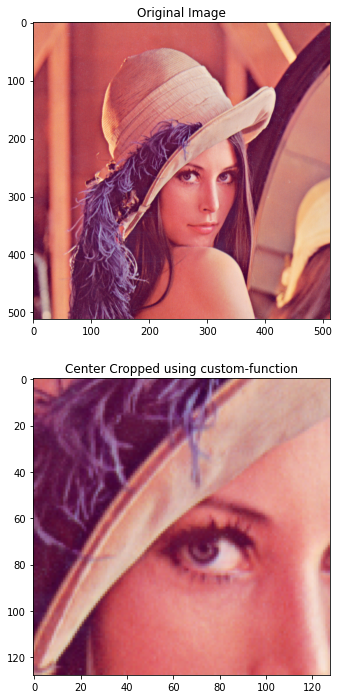

In [23]:
def center_crop(img_arr, target_size):
    center_w = int(img_arr.shape[0]/2)
    center_h = int(img_arr.shape[1]/2)
    
    width = int(target_size[0]/2)
    height = int(target_size[1]/2)
    
    cropped_img = img_arr[center_w-width:center_w+width, center_h-height:center_h+height, :]
    return cropped_img

img2_cropped = center_crop(img2, (128, 128))

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(img2)
a.set_title('Original Image')

# Subplot for center-crop-custom image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(img2_cropped)
a.set_title('Center Cropped using custom-function')

plt.show()

## Task 05 - f : RGB to GrayScale
In this task, you are expected to complete the following function, that takes in an RGB-image in numpy format and returns the gray-scale version of the image as output.

An RGB image can be converted to a gray-scale image using the formula below:

$Gray = 0.2989 * R + 0.5870 * G + 0.1140 * B$

where R,G and B represent the Red, Green and Blue channels of the RGB image.

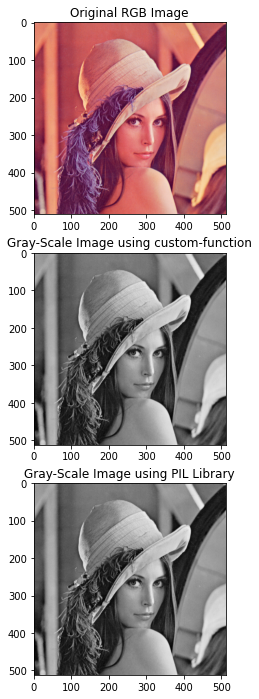

In [29]:
def rgb_2_grayscale(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return imgGray

img2_gray = rgb_2_grayscale(img2)
img2_pil = Image.fromarray(img2)
img2_gray_pil = np.array(img2_pil.convert('L'))

# Show the original and gray-scale images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(img2)
a.set_title('Original RGB Image')

# Subplot for gray-scale-custom image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(img2_gray, cmap='gray')
a.set_title('Gray-Scale Image using custom-function')

# Subplot for gray-scale-custom image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(img2_gray_pil, cmap='gray')
a.set_title('Gray-Scale Image using PIL Library')

plt.show()

## Task 05 - d : Denoising with Filters

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

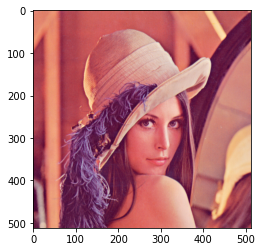

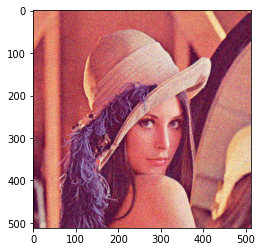

In [16]:
import skimage
%matplotlib inline

img3_n = skimage.util.random_noise(img3)
plt.imshow(img3)
plt.show()
plt.imshow(img3_n)
plt.show()

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

/tmp/ipykernel_20802/1993316796.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gauss


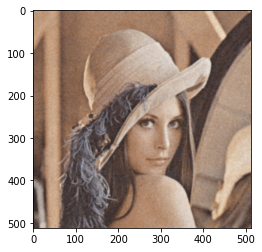

In [17]:
from scipy.ndimage.filters import gaussian_filter as gauss
%matplotlib inline

img3_gauss = gauss(img3_n, sigma=1)   
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

/tmp/ipykernel_20802/797116856.py:1: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter as med


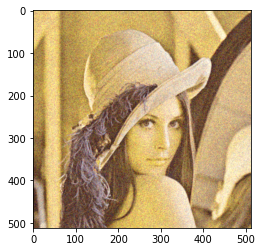

In [18]:
from scipy.ndimage.filters import median_filter as med
%matplotlib inline

img3_med = med(img3_n, size=2)
plt.imshow(img3_med)

### Extract Features
Now that we've done some initial processing of the image to improve its statistics for analysis, we can start to extract features from it.
#### Sobel Edge Detection
As a first step in extracting features, you will apply the Sobel edge detection algorithm. This finds regions of the image with large gradient values in multiple directions. Regions with high omnidirectional gradient are likely to be edges or transitions in the pixel values. 

The code in the cell below applies the Sobel algorithm to the median filtered image, using these steps:

1. Convert the color image to grayscale for the gradient calculation since it is two dimensional.
2. Compute the gradient in the x and y (horizontal and vertical) directions. 
3. Compute the magnitude of the gradient.
4. Normalize the gradient values. 


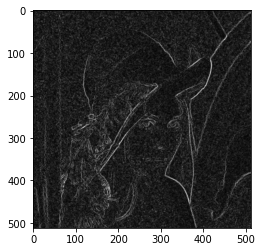

In [34]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

img3_edge = edge_sobel(img3_med)
plt.imshow(img3_edge, cmap="gray")